<a href="https://colab.research.google.com/github/asgardsun/Content-Based-Recommendation/blob/main/Content_Based_Recommendation_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.linear_model import Lasso
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
my_ratings= pd.read_csv('/content/drive/MyDrive/recommendation/data/my-ratings.csv')
movies = pd.read_csv('/content/drive/MyDrive/recommendation/data/movies.csv')
genres = pd.read_pickle('/content/drive/MyDrive/recommendation/data/genres.p')

In [3]:
my_ratings.shape

(99, 4)

In [4]:
my_ratings['userId'].value_counts()

1001    54
1003    29
1002    16
Name: userId, dtype: int64

In [5]:
my_ratings = my_ratings.merge(movies, on='movieId').merge(genres, left_on='movieId', right_index=True)

In [6]:
my_ratings.shape
my_ratings.sample()

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
11,1003,168712,1,2022-11-22 15:40:05,Fifty Shades Darker (2017),Drama|Romance,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


###user1001의 정보


In [7]:
user1001 = my_ratings[my_ratings['userId'] == 1001]

In [8]:
user1001.shape

(54, 26)

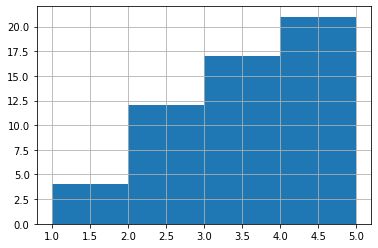

In [9]:
user1001['rating'].hist(bins=4)

In [10]:
user1001['rating'].describe()

count    54.000000
mean      3.203704
std       1.203448
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: rating, dtype: float64

In [11]:
user1001[user1001['rating']==5.0]

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1001,141749,5,2022-11-17 15:40:05,The Danish Girl (2015),Drama,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1001,95441,5,2022-11-18 15:40:05,Ted (2012),Comedy|Fantasy,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1001,112138,5,2022-11-20 15:40:05,22 Jump Street (2014),Action|Comedy|Crime,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1001,141131,5,2022-11-23 15:40:05,Guardians (2016),(no genres listed),1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,1001,112852,5,2022-11-24 15:40:05,Guardians of the Galaxy (2014),Action|Adventure|Sci-Fi,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
18,1001,906,5,2022-11-26 15:40:05,Gaslight (1944),Drama|Thriller,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24,1001,80551,5,2022-11-29 15:40:05,Eat Pray Love (2010),Drama|Romance,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
26,1001,162602,5,2022-11-30 15:40:05,The Girl on the Train (2016),Thriller,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
79,1001,87232,5,2022-12-09 15:54:05,X-Men: First Class (2011),Action|Adventure|Sci-Fi|Thriller|War,0,1,1,0,...,0,0,0,0,0,0,1,1,1,0
84,1001,177763,5,2022-12-12 15:56:05,Murder on the Orient Express (2017),Crime|Drama|Mystery,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [12]:
genre_cols = genres.columns

In [13]:
#user1001번이 본 영화 장르 정보
user1001[genre_cols].sum().sort_values(ascending=False)

Action                18
Drama                 16
Sci-Fi                15
Comedy                14
Adventure             14
Thriller              13
Fantasy                7
Romance                7
Animation              5
Crime                  5
Mystery                5
IMAX                   4
(no genres listed)     3
Horror                 2
War                    2
Children               1
Documentary            1
Film-Noir              0
Musical                0
Western                0
dtype: int64

###나와 친구의 취향 차이

In [14]:
my_ratings['movieId'].value_counts().sort_values(ascending=False)


156371    3
89745     3
110553    3
4886      3
137337    3
109848    3
122892    3
102903    3
122912    3
143245    3
157340    3
158238    3
159093    3
103141    3
134393    3
109673    2
183897    2
152063    2
122918    2
112852    2
135861    2
168712    2
906       2
112138    2
141131    2
162602    2
141749    2
45499     2
95441     2
80551     2
161966    1
177763    1
111759    1
84847     1
111362    1
87232     1
122924    1
38886     1
68319     1
3793      1
149830    1
118900    1
159161    1
27773     1
506       1
88179     1
180095    1
143355    1
180985    1
130452    1
112552    1
166024    1
171765    1
50        1
Name: movieId, dtype: int64

###친구와 호불호가 가장 심한 장르는?

In [15]:
my_ratings_v1 = my_ratings.copy()
my_ratings_v1 = my_ratings_v1.replace(0, np.nan)

In [16]:
my_ratings_v1

,userId,movieId,rating,timestamp,title,genres,(no genres listed),Action,Adventure,Animation,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1001,141749,5,2022-11-17 15:40:05,The Danish Girl (2015),Drama,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003,141749,4,2022-11-17 15:40:05,The Danish Girl (2015),Drama,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1001,95441,5,2022-11-18 15:40:05,Ted (2012),Comedy|Fantasy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,95441,3,2022-11-18 15:40:05,Ted (2012),Comedy|Fantasy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1001,135861,4,2022-11-19 15:40:05,Ted 2 (2015),Comedy,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1001,180985,3,2022-12-22 15:56:05,The Greatest Showman (2017),Drama,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,1001,130452,4,2022-12-23 15:56:05,While We're Young (2014),Comedy|Drama,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1001,112552,3,2022-12-24 15:56:05,Whiplash (2014),Drama,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1001,166024,2,2022-12-25 15:56:05,Whiplash (2013),(no genres listed),1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
for col in genre_cols:
  my_ratings_v1[col] = my_ratings_v1[col] * my_ratings_v1['rating']

In [18]:
user_profile_v1 = my_ratings_v1.groupby(['userId'])[genre_cols].mean()
user_profile_v1

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
userId,,,,,,,,,,,,,,,,,,,,
1001,3.0,3.333333,3.714286,2.8,3.0,3.142857,3.200000,1.0,3.375,3.571429,NaN,3.0,3.000000,NaN,2.8,2.857143,3.266667,3.000000,4.0,NaN
1002,NaN,3.333333,2.800000,2.0,1.0,2.000000,2.000000,2.0,NaN,1.500000,NaN,2.0,3.500000,NaN,2.0,1.000000,3.166667,2.200000,NaN,NaN
1003,4.0,3.000000,3.625000,3.6,3.0,3.000000,2.333333,3.0,2.800,3.250000,NaN,3.0,2.333333,NaN,2.5,2.000000,3.428571,2.833333,2.0,NaN


In [19]:
#1001번과 1002번,1003번의 데이터를 합친 describe
#std가 크면 클수록 호불호가 큰 장르라는걸 알 수 있다.
user_profile_discribe = user_profile_v1.describe() 
user_profile_discribe

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,2.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.0,2.000000,3.000000,0.0,3.000000,3.000000,0.0,3.000000,3.000000,3.000000,3.000000,2.000000,0.0
mean,3.500000,3.222222,3.379762,2.8,2.333333,2.714286,2.511111,2.0,3.087500,2.773810,NaN,2.666667,2.944444,NaN,2.433333,1.952381,3.287302,2.677778,3.000000,NaN
std,0.707107,0.192450,0.504069,0.8,1.154701,0.622700,0.619438,1.0,0.406586,1.114797,NaN,0.577350,0.585314,NaN,0.404145,0.929487,0.132166,0.422076,1.414214,NaN
min,3.000000,3.000000,2.800000,2.0,1.000000,2.000000,2.000000,1.0,2.800000,1.500000,NaN,2.000000,2.333333,NaN,2.000000,1.000000,3.166667,2.200000,2.000000,NaN
25%,3.250000,3.166667,3.212500,2.4,2.000000,2.500000,2.166667,1.5,2.943750,2.375000,NaN,2.500000,2.666667,NaN,2.250000,1.500000,3.216667,2.516667,2.500000,NaN
50%,3.500000,3.333333,3.625000,2.8,3.000000,3.000000,2.333333,2.0,3.087500,3.250000,NaN,3.000000,3.000000,NaN,2.500000,2.000000,3.266667,2.833333,3.000000,NaN
75%,3.750000,3.333333,3.669643,3.2,3.000000,3.071429,2.766667,2.5,3.231250,3.410714,NaN,3.000000,3.250000,NaN,2.650000,2.428571,3.347619,2.916667,3.500000,NaN
max,4.000000,3.333333,3.714286,3.6,3.000000,3.142857,3.200000,3.0,3.375000,3.571429,NaN,3.000000,3.500000,NaN,2.800000,2.857143,3.428571,3.000000,4.000000,NaN


In [20]:
#3명이 다 본 영화로 호불호 영화 추리기
user_profile_discribe.loc[:, user_profile_discribe.loc['count']==3]


,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Fantasy,Horror,IMAX,Mystery,Romance,Sci-Fi,Thriller
count,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,3.222222,3.379762,2.8,2.333333,2.714286,2.511111,2.0,2.773810,2.666667,2.944444,2.433333,1.952381,3.287302,2.677778
std,0.192450,0.504069,0.8,1.154701,0.622700,0.619438,1.0,1.114797,0.577350,0.585314,0.404145,0.929487,0.132166,0.422076
min,3.000000,2.800000,2.0,1.000000,2.000000,2.000000,1.0,1.500000,2.000000,2.333333,2.000000,1.000000,3.166667,2.200000
25%,3.166667,3.212500,2.4,2.000000,2.500000,2.166667,1.5,2.375000,2.500000,2.666667,2.250000,1.500000,3.216667,2.516667
50%,3.333333,3.625000,2.8,3.000000,3.000000,2.333333,2.0,3.250000,3.000000,3.000000,2.500000,2.000000,3.266667,2.833333
75%,3.333333,3.669643,3.2,3.000000,3.071429,2.766667,2.5,3.410714,3.000000,3.250000,2.650000,2.428571,3.347619,2.916667
max,3.333333,3.714286,3.6,3.000000,3.142857,3.200000,3.0,3.571429,3.000000,3.500000,2.800000,2.857143,3.428571,3.000000


In [21]:
#std(표준편차)가  큰 장르는 Children으로 알 수 있다.

In [22]:
sci_fi = my_ratings[my_ratings['Children']==1]

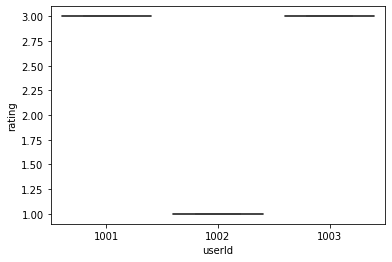

In [23]:
#1001번은 영화를 한번 보았으며, 3점을 주었고
#1002번은 영화를 한번 보았으며, 1점을 주었고
#1003번은 영화를 한번 보았으며, 3점을 남겼다.
sns.boxplot(data=sci_fi , x='userId', y='rating')

###Lasso로 User Profile 만들기 

Lasso hyperparameter 튜닝
 - Menual Search : 알파에다가 0.1 , 0.2 , 0.3 등 다양한 데이터들을 넣어보고 
 hyperparameter 값들을 넣어보고 퍼포먼스를 잘 나오는것을 골라서 쓰는것
 - Grid Search : 탐색의 대상이 되는 특정 구간 내의 후보 hyperparameter 값들을 일정한 간격을 두고 선정하여, 이들 각각에 대하여 측정한 성능 결과를 기록한 뒤, 가장 높은 성능을 발휘했던 hyperparameter 값을 선정하는 방법
 - Random Search : Grid Search와 큰 맥락은 유사하나, 탐색 대상 구간 내의 후보 hyperparameter 값들을 랜덤 샘플리을 통해 선정한다는 점이 다르다. Random Search는 Grid Search에 비해 불필요한 반복 수행 횟수를 대폭 줄이면서, 동시에 정해진 간격 사이에 위치한 값들에 대해서도 확률적으로 탐색이 가능하므로, 최적 hyperparameter 값을 더 빨리 찾을 수 있다.

In [24]:
model = Lasso(random_state=42)

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_rand

In [26]:
#Random Search로 최적의 alpha값 찾기
param_grid = {'alpha' : sp_rand()}

rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=200, cv=25, random_state=42)

In [27]:
rsearch.fit(user1001[genre_cols], user1001['rating'])

RandomizedSearchCV(cv=25, estimator=Lasso(random_state=42), n_iter=200,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f398a49cbb0>},
                   random_state=42)

*RandomizedSearch 결과

In [28]:
rsearch.best_estimator_.alpha

0.05147875124998935

In [29]:
intercept = rsearch.best_estimator_.intercept_
coef = rsearch.best_estimator_.coef_
print(intercept)
print(coef)

3.0476572371468333
[-0.         -0.          0.45914443 -0.         -0.          0.
  0.         -0.          0.12490545  0.          0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.          0.        ]


In [30]:
user1001_profile = pd.DataFrame([intercept, *coef], index=['intercept', *genre_cols], columns=['score'])
user1001_profile


,score
intercept,3.047657
(no genres listed),-0.000000
Action,-0.000000
Adventure,0.459144
Animation,-0.000000
Children,-0.000000
Comedy,0.000000
Crime,0.000000
Documentary,-0.000000
Drama,0.124905


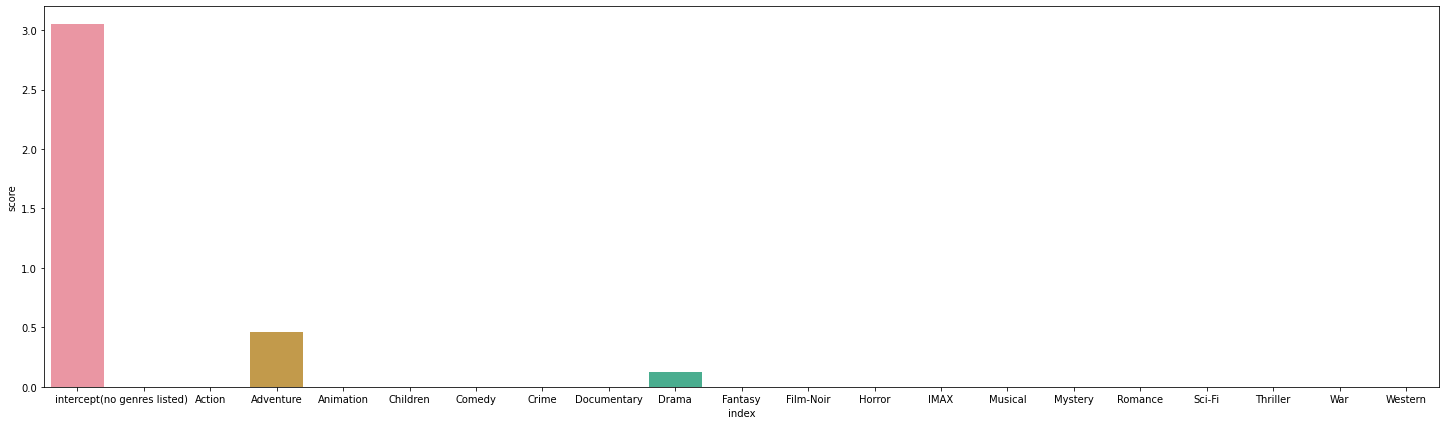

In [31]:
plt.figure(figsize=(25, 7))
sns.barplot(data=user1001_profile.reset_index(), x='index', y='score')

In [32]:
predictions =rsearch.best_estimator_.predict(genres)
predictions

array([3.50680166, 3.50680166, 3.04765724, ..., 3.17256269, 3.04765724,
       3.04765724])

In [33]:
#user1001의 예상 평점 대입
genres['user1001'] = predictions
rating_predictions = genres[~genres.index.isin(user1001['movieId'])].sort_values('user1001',ascending=False)
rating_predictions.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1001
movieId,,,,,,,,,,,,,,,,,,,,,
7248,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,3.631707
4998,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,3.631707
4956,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,3.631707
71745,0,0,1,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,3.631707
71810,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,3.631707


In [34]:
#user1001이 첫번째로 제일 좋아할 영화 순으로 정렬
ratings_predictions = rating_predictions.merge(movies[['movieId','title']],left_index=True, right_on='movieId')
ratings_predictions.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1001,movieId,title
4849,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,3.631707,7248,"Suriyothai (a.k.a. Legend of Suriyothai, The) ..."
3641,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,3.631707,4998,"Defiant Ones, The (1958)"
3608,0,1,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,3.631707,4956,"Stunt Man, The (1980)"
7161,0,0,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,3.631707,71745,Where the Wild Things Are (2009)
7162,0,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,3.631707,71810,Legionnaire (1998)


In [35]:
#코미디 영화이고 애니매이션은 아니었으면 하는 영화 추천
ratings_predictions[(ratings_predictions['Comedy']==1) & (ratings_predictions['Animation']==0)].head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user1001,movieId,title
3608,0,1,1,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,3.631707,4956,"Stunt Man, The (1980)"
3526,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,3.631707,4818,Extreme Days (2001)
3437,0,0,1,0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,3.631707,4683,"Wizard, The (1989)"
7441,0,1,1,0,0,1,1,0,1,0,...,0,1,0,0,1,0,1,3.631707,81132,Rubber (2010)
7492,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,3.631707,82765,Little Big Soldier (Da bing xiao jiang) (2010)


In [36]:
#해리포터 시리즈 평점 찾기
ratings_predictions.loc[ratings_predictions['title'].str.contains('Harry Potter'), ['user1001','title']]

,user1001,title
7644,3.631707,Harry Potter and the Deathly Hallows: Part 2 (...
6522,3.631707,Harry Potter and the Order of the Phoenix (2007)
5166,3.506802,Harry Potter and the Prisoner of Azkaban (2004)
4076,3.506802,Harry Potter and the Chamber of Secrets (2002)
3574,3.506802,Harry Potter and the Sorcerer's Stone (a.k.a. ...
6062,3.506802,Harry Potter and the Goblet of Fire (2005)
7465,3.506802,Harry Potter and the Deathly Hallows: Part 1 (...
7078,3.506802,Harry Potter and the Half-Blood Prince (2009)
